In [1]:
# Ejemplo pronóstico de serie temporal Univariada
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from numpy import array

Using TensorFlow backend.


In [2]:
df_dataset= pd.read_csv('daily-total-female-births.csv')
df_dataset.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


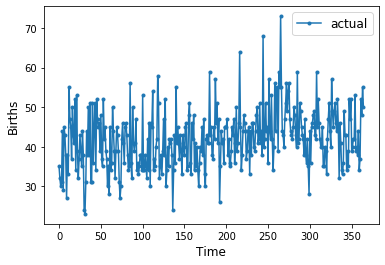

In [3]:
plt.plot(df_dataset.Births, marker='.', label="actual")
plt.ylabel('Births', size=12)
plt.xlabel('Time', size=12)
plt.legend(fontsize=12)
plt.show()

In [4]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [5]:
from sklearn.preprocessing import MinMaxScaler

# choose a number of time steps
n_steps = 10

values = df_dataset.Births.values.astype(float)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values[:,np.newaxis])

# split into samples
X, y = split_sequence(scaled, n_steps)

print(X.shape)
print(y.shape)
# values.shape

(355, 10, 1)
(355, 1)


In [25]:
# print(X)
# print(y)
# df_dataset.head(50)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [7]:
# split into train and test sets

def get_train_test(X, y, n_test):
    n_train = X.shape[0] - n_test
    train = X[:n_train, :, :]
    test = X[n_train:, :, :]

    # # split into input and outputs
    train_X, train_y = train, y[:n_train]
    test_X, test_y = test, y[n_train:]
    # reshape input to be 3D [samples, timesteps, features]
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
    
    return train_X, train_y, test_X, test_y

n_test=30
train_X, train_y, test_X, test_y=get_train_test(X, y, n_test)

(325, 10, 1) (325, 1) (30, 10, 1) (30, 1)


In [8]:
from keras.layers import Bidirectional
# define model
# return_sequences=True
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
history = model.fit(train_X, train_y, epochs=100, batch_size=5, validation_data=(test_X, test_y), verbose=2, shuffle=True)

Train on 325 samples, validate on 30 samples
Epoch 1/100
 - 2s - loss: 0.0485 - val_loss: 0.0203
Epoch 2/100
 - 0s - loss: 0.0205 - val_loss: 0.0199
Epoch 3/100
 - 0s - loss: 0.0201 - val_loss: 0.0198
Epoch 4/100
 - 0s - loss: 0.0205 - val_loss: 0.0196
Epoch 5/100
 - 0s - loss: 0.0207 - val_loss: 0.0196
Epoch 6/100
 - 0s - loss: 0.0201 - val_loss: 0.0215
Epoch 7/100
 - 0s - loss: 0.0204 - val_loss: 0.0195
Epoch 8/100
 - 1s - loss: 0.0205 - val_loss: 0.0196
Epoch 9/100
 - 1s - loss: 0.0207 - val_loss: 0.0195
Epoch 10/100
 - 1s - loss: 0.0201 - val_loss: 0.0217
Epoch 11/100
 - 1s - loss: 0.0200 - val_loss: 0.0213
Epoch 12/100
 - 1s - loss: 0.0204 - val_loss: 0.0196
Epoch 13/100
 - 1s - loss: 0.0204 - val_loss: 0.0193
Epoch 14/100
 - 1s - loss: 0.0199 - val_loss: 0.0193
Epoch 15/100
 - 1s - loss: 0.0200 - val_loss: 0.0197
Epoch 16/100
 - 1s - loss: 0.0204 - val_loss: 0.0193
Epoch 17/100
 - 0s - loss: 0.0200 - val_loss: 0.0198
Epoch 18/100
 - 0s - loss: 0.0201 - val_loss: 0.0196
Epoch 19/1

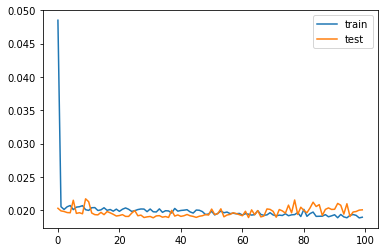

In [9]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [10]:
yhat_train = model.predict(train_X)
# print(yhat_train)
# print(train_y)

yhat_test = model.predict(test_X)
# print(yhat_test)
# print(test_y)

No handles with labels found to put in legend.


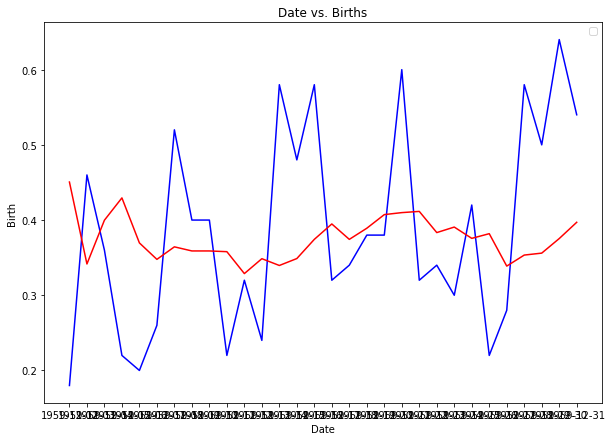

In [11]:
plt.figure(figsize=(10, 7))
plt.plot(df_dataset['Date'][-n_test:], test_y, 'b-')
plt.plot(df_dataset['Date'][-n_test:], yhat_test, 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Birth')
plt.title('Date vs. Births');